In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df_은행 = pd.read_excel("은행_정규화.xlsx") ## 데이터 불러오기
#df_연금 = pd.read_excel("연금_정규화.xlsx")
#df_생활인구 = pd.read_excel("생활인구_정규화.xlsx")
df_독거노인 = pd.read_excel("독거노인_정규화.xlsx")
#df_소득 = pd.read_excel("소득_정규화.xlsx")
df_기초생활 = pd.read_excel("기초생활보장수급자_정규화.xlsx")
df_요양기관 = pd.read_excel("요양기관_정규화.xlsx")

In [3]:
## 은행분포 : 값이 낮을수록 은행 분포가 낮고 값이 높을수록 은행 분포가 높도록 설정
df_은행["행정동별은행분포"]=1-df_은행["행정동별은행합계"] 
#df_은행

In [4]:
#df_은행["행정동코드"] = df_연금["행정동코드"]
#df_은행["행정동코드"] = df_소득["행정동코드"]
df_은행["행정동코드"] = df_독거노인["행정동코드"]
#df_은행["행정동코드"] = df_생활인구["행정동코드"]
df_은행["행정동코드"] = df_요양기관["행정동코드"]
df_은행["행정동코드"] = df_기초생활["행정동코드"]

In [5]:
#TargetA 가중치
df_은행["TargetA밀도"] =df_독거노인["행정동별독거노인합계"]*0.25+df_요양기관["행정동별요양기관정원"]*0.25+ df_기초생활["행정동별기초생활보장수급자합계"]*0.5
#['행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생  보장수급자합계', '행정동별은행합계
#TargetB 가중치
#df_은행["TargetB밀도"] = df_소득["행정동별평균소득"]*0.5 + df_연금["행정동별연금평균"]*0.25 +df_생활인구["행정동별생활인구합계"]*0.25
#Index(['행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계'], dtype='object')

In [6]:
#df_은행

In [7]:
# KMeans (TargetA)

In [8]:
X_a = df_은행[["행정동별은행분포","TargetA밀도"]]
#X_a 

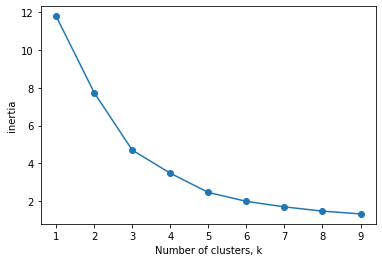

In [9]:
# Inertia value를 이용한 적정 군집수 판단

ks = range(1,10) # 1부터 10까지의 군집을 가지고 있을때

inertias = []



for k in ks:

    kMeans = KMeans(n_clusters=k)

    kMeans.fit(X_a)

    inertias.append(kMeans.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show() 


In [10]:
# 3 에서 5까지 변화의 값이 크지않다. 그러므로 3개에서 5개 사이의 클러스터를 가졌을때 적절하다
# k = 3로 설정
kMeans = KMeans(n_clusters=4,algorithm='auto')
kMeans.fit(X_a)

y_kmed = kMeans.fit_predict(X_a)

predict_a4 = pd.DataFrame(kMeans.predict(X_a))
predict_a4.columns=['predict_a4']

y_kmed

array([1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 2, 2, 0, 3, 3, 3, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 3, 0, 0, 2,
       3, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 2, 0, 2, 0, 2, 2,
       2, 3, 0, 2, 1, 0, 0, 0, 2, 3, 3, 0, 0, 1, 0, 3, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3,

In [11]:
kMeans.inertia_

3.473438492577206

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X_a, y_kmed)
print(silhouette_avg)

0.39736255047492486


In [13]:
sample_silhouette_values = silhouette_samples(X_a, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.371204222224198
0.27266966294703787
0.46651005402528695


In [14]:
r = pd.concat([X_a,predict_a4],axis=1)
#r

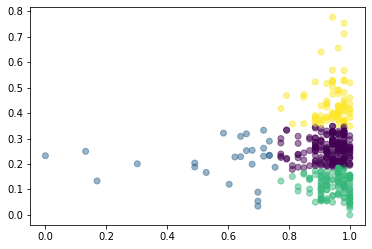

In [15]:
#분포도 시각화
plt.scatter(r['행정동별은행분포'],r['TargetA밀도'],c=r['predict_a4'],alpha=0.5)


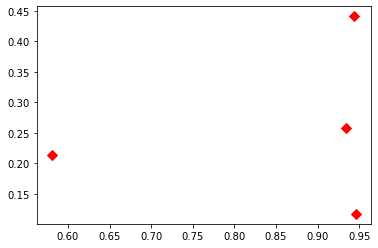

In [16]:
#중심표시
centers = pd.DataFrame(kMeans.cluster_centers_,columns=['행정동별은행분포','TargetA밀도'])
center_x = centers['행정동별은행분포']
center_y = centers['TargetA밀도']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

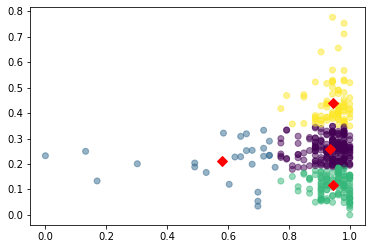

In [17]:
#분포도에 중심표시
plt.scatter(r['행정동별은행분포'],r['TargetA밀도'],c=r['predict_a4'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

In [18]:
centers = kMeans.cluster_centers_
print(centers) # 0 1 2 3 -> 3 1 0 2

[[0.93401015 0.25824122]
 [0.58055152 0.21353453]
 [0.9462502  0.11686789]
 [0.94385642 0.44112554]]


In [19]:
data = pd.merge(df_은행, r, on=["행정동별은행분포", "TargetA밀도"])

In [20]:
data = data[['행정동코드', '구', '동', 'predict_a4']]
#data

In [21]:
data  

,행정동코드,구,동,predict_a4
0,11110530,종로구,사직동,1
1,11110540,종로구,삼청동,2
2,11110550,종로구,부암동,2
3,11110560,종로구,평창동,2
4,11110570,종로구,무악동,2
...,...,...,...,...
419,11740700,송파구,풍납1동,0
420,11740570,송파구,거여1동,3
421,11740610,강동구,고덕1동,3
422,11740685,강동구,고덕2동,3


In [22]:
def test(x):
    if x==0: return 3
    elif x==1: return 1
    elif x==2: return 0
    elif x==3: return 2
        
data["predict_a4"] = data["predict_a4"].apply(test)

In [23]:
data

,행정동코드,구,동,predict_a4
0,11110530,종로구,사직동,1
1,11110540,종로구,삼청동,0
2,11110550,종로구,부암동,0
3,11110560,종로구,평창동,0
4,11110570,종로구,무악동,0
...,...,...,...,...
419,11740700,송파구,풍납1동,3
420,11740570,송파구,거여1동,2
421,11740610,강동구,고덕1동,2
422,11740685,강동구,고덕2동,2


In [22]:
data['cluster3'] = (data['predict_a4'] == 0 ).astype(int)
data['cluster1'] = (data['predict_a4'] == 1 ).astype(int)
data['cluster0'] = (data['predict_a4'] == 2 ).astype(int)
data['cluster2'] = (data['predict_a4'] == 3 ).astype(int)
data

,행정동코드,구,동,predict_a4,cluster3,cluster1,cluster0,cluster2
0,11110530,종로구,사직동,2,0,0,1,0
1,11110540,종로구,삼청동,1,0,1,0,0
2,11110550,종로구,부암동,1,0,1,0,0
3,11110560,종로구,평창동,1,0,1,0,0
4,11110570,종로구,무악동,1,0,1,0,0
...,...,...,...,...,...,...,...,...
419,11740700,송파구,풍납1동,3,0,0,0,1
420,11740570,송파구,거여1동,0,1,0,0,0
421,11740610,강동구,고덕1동,0,1,0,0,0
422,11740685,강동구,고덕2동,0,1,0,0,0


In [23]:
data['cluster'] = data['cluster3']*3 + data['cluster1'] + data['cluster0']*0 + data['cluster2'] * 2
data # 0 1 2 3 -> 3 1 0 2

,행정동코드,구,동,predict_a4,cluster3,cluster1,cluster0,cluster2,cluster
0,11110530,종로구,사직동,2,0,0,1,0,0
1,11110540,종로구,삼청동,1,0,1,0,0,1
2,11110550,종로구,부암동,1,0,1,0,0,1
3,11110560,종로구,평창동,1,0,1,0,0,1
4,11110570,종로구,무악동,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
419,11740700,송파구,풍납1동,3,0,0,0,1,2
420,11740570,송파구,거여1동,0,1,0,0,0,3
421,11740610,강동구,고덕1동,0,1,0,0,0,3
422,11740685,강동구,고덕2동,0,1,0,0,0,3


In [24]:
data2 = data[['행정동코드', '구', '동', 'cluster']]
data2

,행정동코드,구,동,cluster
0,11110530,종로구,사직동,0
1,11110540,종로구,삼청동,1
2,11110550,종로구,부암동,1
3,11110560,종로구,평창동,1
4,11110570,종로구,무악동,1
...,...,...,...,...
419,11740700,송파구,풍납1동,2
420,11740570,송파구,거여1동,3
421,11740610,강동구,고덕1동,3
422,11740685,강동구,고덕2동,3


In [ ]:
def my_color_function(feature):
    """Maps low values to green and high values to red."""
    if unemployment_dict[feature['predict']] == 0:
        return '#ff0000'
    elif unemployment_dict[feature['predict']] == 1:
        return '#008000'
    elif unemployment_dict[feature['predict']] == 2:
        return '#008000'
    elif unemployment_dict[feature['predict']] == 3:
        return '#008000'

In [21]:
#주의 : 타겟이 무엇인지 위의 중심점 좌표를 보고 바꿀것(돌릴떄마다 바뀜...)
data['target_a4'] = (data['predict_a4'] == 1 ).astype(int)


In [22]:
#data

In [23]:
data_a = data[['행정동코드', '구', '동', 'target_a4']]

In [24]:
data_a.to_excel("target_a4.xlsx", encoding='utf-8')

## 시각화

In [27]:
#지도 코드
import pandas as pd
import folium

max_data = max(data2['cluster']) #이것처럼 생활인구면 max(data['행정동별생활인구합계']), 연금이면 max(data['행정동별연금합계']) 이렇게 지정해주세요.

geo_data = 'complete_seoul-dong.geojson' #경로는 geojson 있는데로 바꿔주세요.

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, tiles = 'cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=data,
    columns=('행정동코드', 'predict_a4'),
    key_on='feature.properties.행정동코드',
    fill_color='YlGn',
    bins=[(-0.000000001)*max_data, 0.25*max_data, 0.5*max_data, 0.75*max_data, (1.000001)*max_data],
    legend_name='서울 행정동별 TargetA와 은행분포 비교', #자기 데이터 제목
    highlight = True,
).add_to(m)

folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['동'],
        
    aliases=['위치:'])
)

m.save('서울 행정동별 TargetA와 은행분포 비교4.html') #저장할 html 이름 지정
#소득.html 열어서 확인


In [26]:
X_b = df_은행[["행정동별은행분포","TargetB밀도"]]
#X_b

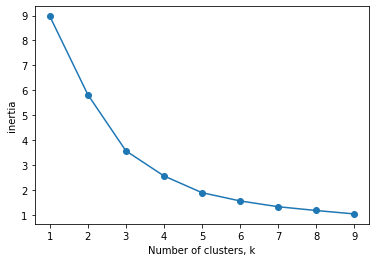

In [27]:
# Inertia value를 이용한 적정 군집수 판단

ks = range(1,10) # 1부터 10까지의 군집을 가지고 있을때

inertias = []



for k in ks:

    kMeans = KMeans(n_clusters=k)

    kMeans.fit(X_b)

    inertias.append(kMeans.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show() 


In [28]:
#k=4로 설정
kMeans = KMeans(n_clusters=4,algorithm='auto')
kMeans.fit(X_b)

y_kmed = kMeans.fit_predict(X_b)

predict_b4 = pd.DataFrame(kMeans.predict(X_b))
predict_b4.columns=['predict_b4']

In [29]:
kMeans.inertia_

2.5606278725799054

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X_b, y_kmed)
print(silhouette_avg)

0.4393730562911228


In [31]:
sample_silhouette_values = silhouette_samples(X_b, y_kmed)
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.4792648921542737
0.3823875574358818
0.3682198774750035
0.6337582979369841


In [32]:
r = pd.concat([X_b,predict_b4],axis=1)
#r

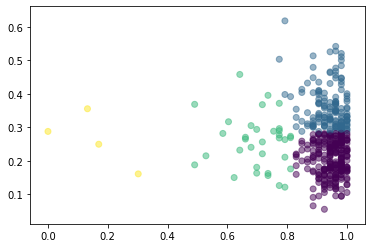

In [33]:
#분포도 시각화
plt.scatter(r['행정동별은행분포'],r['TargetB밀도'],c=r['predict_b4'],alpha=0.5)


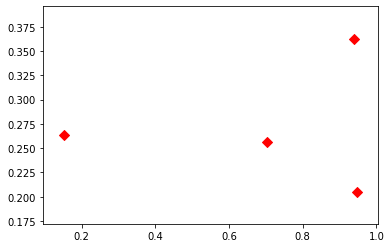

In [34]:
#중심표시
centers = pd.DataFrame(kMeans.cluster_centers_,columns=['행정동별은행분포','TargetB밀도'])
center_x = centers['행정동별은행분포']
center_y = centers['TargetB밀도']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

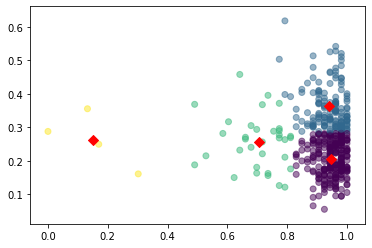

In [35]:
#분포도에 중심표시
plt.scatter(r['행정동별은행분포'],r['TargetB밀도'],c=r['predict_b4'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

In [36]:
centers = kMeans.cluster_centers_
print(centers)

[[0.94718528 0.20525799]
 [0.93967579 0.36287269]
 [0.70421754 0.25644529]
 [0.1509434  0.26345986]]


In [39]:
data = pd.merge(df_은행, r, on=["행정동별은행분포", "TargetB밀도"])

In [42]:
data = data[['행정동코드', '구', '동', 'predict_b4']]
#data

In [43]:
#주의 : 타겟이 무엇인지 위의 중심점 좌표를 보고 바꿀것(돌릴떄마다 바뀜...)
data['target_b4'] = (data['predict_b4'] == 1 ).astype(int)


In [44]:
#data

In [45]:
data.columns

Index(['행정동코드', '구', '동', 'predict_b4', 'target_b4'], dtype='object')

In [46]:
data_b = data[['행정동코드', '구', '동', 'target_b4']]

In [47]:
data_b.to_excel("target_b4.xlsx", encoding='utf-8')

## 시각화

In [48]:
#지도 코드
import pandas as pd
import folium

max_data = max(data['predict_b4']) #이것처럼 생활인구면 max(data['행정동별생활인구합계']), 연금이면 max(data['행정동별연금합계']) 이렇게 지정해주세요.

geo_data = 'complete_seoul-dong.geojson' #경로는 geojson 있는데로 바꿔주세요.

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, tiles = 'cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=data,
    columns=('행정동코드', 'predict_b4'),
    key_on='feature.properties.행정동코드',
    fill_color='YlGn',
    bins=[(-0.000000001)*max_data, 0.25*max_data, 0.5*max_data, 0.75*max_data, (1.000001)*max_data],
    legend_name='서울 행정동별 TargetB와 은행분포 비교', #자기 데이터 제목
    highlight = True,
).add_to(m)

folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['동'],
    aliases=['위치:'])
)

m.save('서울 행정동별 TargetB와 은행분포 비교4.html') #저장할 html 이름 지정
#소득.html 열어서 확인
